In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Importing all the required python modules

In [9]:
# Reading the dataset
df = pd.read_csv('bank_cleaned.csv')

<h3>Data Exploration</h3>

In [10]:
# Head function will show us the top records of the dataset. By default python shows the top 5 records.
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [11]:
# Tail function will show you the last 5 records of the dataset.
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [12]:
# It returns the column labels of the given dataframe.
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [13]:
# Identifying the datatype for every Variable
df.dtypes

Unnamed: 0           int64
age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object

<h3>Data Cleaning and Visualization</h3>

In [14]:
# Removing the columns that are not required, Unnamed has no significance and response is a duplicate for response_binary
df.drop(['Unnamed: 0','response'], axis=1, inplace=True)

In [15]:
# Using df.info() to check if any null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response_binary  40841 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 5.0+ MB


In [16]:
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.
df.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
count,40841.000000,40841,40841,40841,40841,40841.000000,40841,40841,40841.000000,40841,40841.000000,40841.000000,40841.000000,40841.000000,40841,40841.000000
unique,NaN,12,3,3,2,NaN,2,2,NaN,12,NaN,NaN,NaN,NaN,3,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,8805,24641,21933,40078,NaN,22820,34042,NaN,12496,NaN,NaN,NaN,NaN,34802,NaN
mean,40.790676,NaN,NaN,NaN,NaN,1073.981807,NaN,NaN,15.863666,NaN,4.308949,2.774149,32.248304,0.436791,NaN,0.113587
std,10.475473,NaN,NaN,NaN,NaN,1712.556186,NaN,NaN,8.313608,NaN,4.305823,3.104177,90.738402,1.572342,NaN,0.317313
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,1.000000,NaN,0.100000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,8.000000,NaN,1.730000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,421.000000,NaN,NaN,16.000000,NaN,3.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1333.000000,NaN,NaN,21.000000,NaN,5.300000,3.000000,-1.000000,0.000000,NaN,0.000000


In [17]:
# We will check for any duplicate records in the data. We will remove this data from the data set so that we get only distinct records.
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary


In [18]:
# Dropping the rows with null values
df.dropna()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,1


In [19]:
# Correlation Matrix to check if any two collumn are correlated and can be removed.
df.corr()

,age,balance,day,duration,campaign,pdays,previous,response_binary
age,1.000000,0.103405,-0.010549,-0.007422,0.003563,-0.005815,0.012862,0.023204
balance,0.103405,1.000000,0.008062,0.035481,-0.026482,0.017674,0.036765,0.069456
day,-0.010549,0.008062,1.000000,-0.032656,0.172387,-0.089812,-0.056279,-0.035323
duration,-0.007422,0.035481,-0.032656,1.000000,-0.081852,-0.000242,0.004824,0.400681
campaign,0.003563,-0.026482,0.172387,-0.081852,1.000000,-0.094891,-0.051522,-0.072495
pdays,-0.005815,0.017674,-0.089812,-0.000242,-0.094891,1.000000,0.567728,0.108554
previous,0.012862,0.036765,-0.056279,0.004824,-0.051522,0.567728,1.000000,0.128274
response_binary,0.023204,0.069456,-0.035323,0.400681,-0.072495,0.108554,0.128274,1.000000


In [20]:
# Defining numerical and categorical variables
num_atr=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

cat_atr=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'poutcome' , 'month']

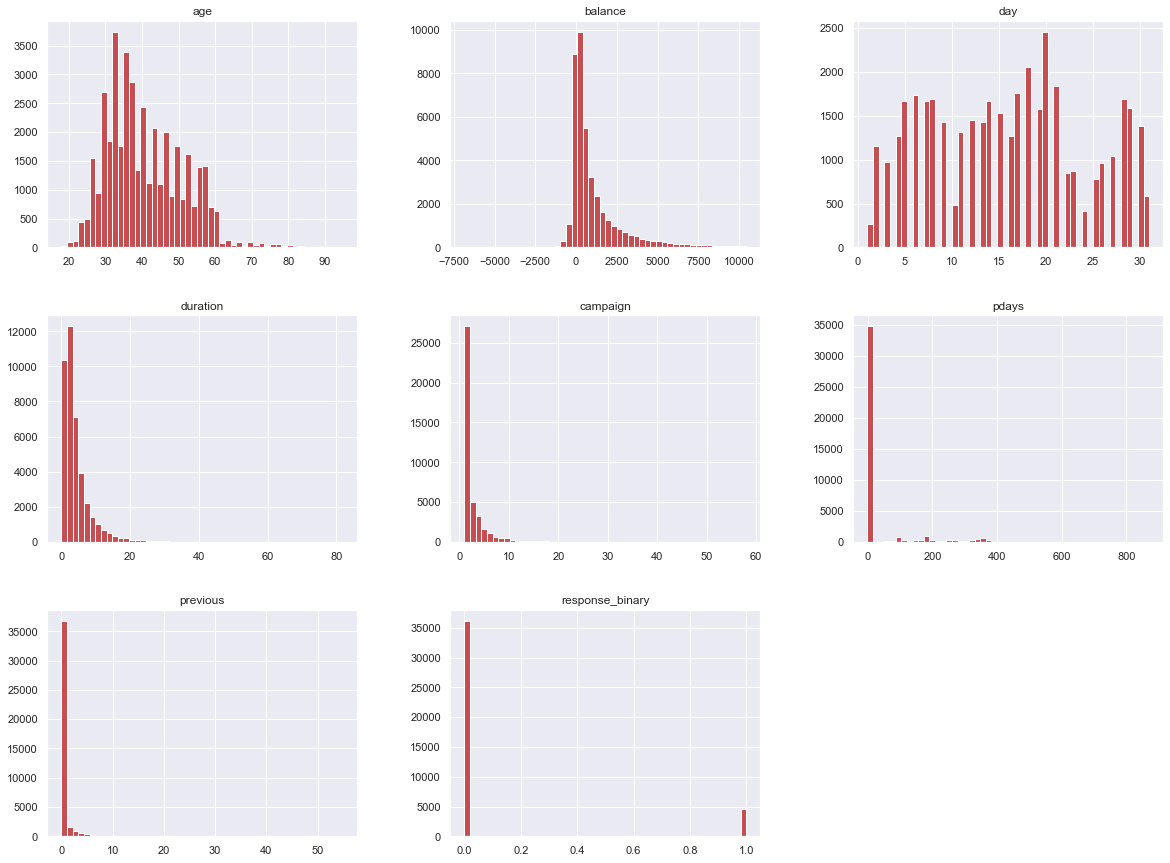

In [21]:
# checking distribution for all the variables in the data by plotting Histograms for all the variable
df.hist(bins=50, figsize=(20,15), color='r')
plt.show()
# Colclusion: age and day are normally distributes and balance,duration & campaign are right skewed

<AxesSubplot:>

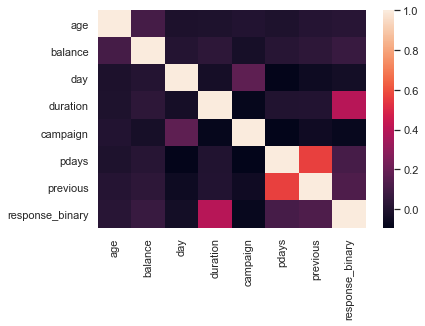

In [24]:
df_corr=df.corr()
sns.heatmap(df_corr)
# Response of the customers is highly dependent on duration of the contact

<h3>KNN Classification Algorithm</h3>

In [34]:
# Dividing the dataset into independent variables and target variables
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']

In [35]:
# Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
X_train.head()
# Training dataset contain a lot of categorical values which needs to be converted into numerical values to apply KNN classifier

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
29058,25,management,married,tertiary,no,4461,no,no,11,mar,13.27,5,-1,0,unknown
38366,30,technician,single,secondary,no,846,no,no,2,nov,1.25,2,-1,0,unknown
28620,40,management,divorced,secondary,no,108,no,no,9,feb,0.17,6,-1,0,unknown
22002,50,blue-collar,married,primary,no,157,no,no,27,aug,0.83,4,-1,0,unknown
34113,33,technician,married,secondary,no,221,yes,no,13,may,11.15,1,355,4,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,40,blue-collar,married,primary,no,2635,yes,no,2,jun,0.33,21,-1,0,unknown
32511,45,entrepreneur,married,tertiary,no,3689,yes,no,7,may,6.62,1,169,5,failure
5192,38,blue-collar,married,secondary,no,526,yes,yes,23,may,9.22,2,-1,0,unknown
12172,50,blue-collar,divorced,primary,no,5,no,no,7,jul,1.97,1,-1,0,unknown


In [40]:
# Using LabelEncoder to convert categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)
X_train[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,job,marital,education,default,housing,loan,poutcome,month
29058,4,1,2,0,0,0,2,7
38366,10,2,1,0,0,0,2,9
28620,4,0,1,0,0,0,2,3
22002,1,1,0,0,0,0,2,1
34113,10,1,1,0,1,0,0,8


In [42]:
# Using StandardScaler for normal distribution of numerical data
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
stds.fit_transform(X_train[num_atr])

array([[-1.50912117,  1.9896244 , -0.58257944, ...,  0.70583799,
        -0.36707161, -0.27526672],
       [-1.03265287, -0.12941615, -1.66780036, ..., -0.25313905,
        -0.36707161, -0.27526672],
       [-0.07971627, -0.56201696, -0.82373964, ...,  1.025497  ,
        -0.36707161, -0.27526672],
       ...,
       [-0.27030359, -0.31699374,  0.86438179, ..., -0.25313905,
        -0.36707161, -0.27526672],
       [ 0.87322033, -0.6223935 , -1.06489985, ..., -0.57279806,
        -0.36707161, -0.27526672],
       [ 1.06380765, -0.61008372, -0.94431975, ..., -0.25313905,
         3.68133962,  0.3531933 ]])

In [43]:
a1 = X_train[cat_atr]
b1 = stds.transform(X_train[num_atr])

x_train = np.hstack([a1,b1])

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [45]:
# As testing dataset also contain categorical values it also needs to be converted into numerical values to apply KNN classifier
# Using LabelEncoder to convert categorical values of testing into numerical values

X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
X_test[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,job,marital,education,default,housing,loan,poutcome,month
11616,6,1,1,1,0,1,2,5
38206,10,1,1,0,0,1,1,10
28205,10,1,1,0,1,0,2,3
7192,1,1,1,0,1,0,2,8
13375,1,2,1,0,0,0,2,5


In [46]:
# Using StandardScaler for normal distribution of numerical data in testing data
stds.fit_transform(X_test[num_atr])

array([[ 1.76101692, -0.60429123, -1.78666901, ...,  0.42217947,
        -0.36450278, -0.28604509],
       [ 1.28109422,  1.67351798,  0.48245993, ..., -0.23793454,
         1.73618478,  1.03469034],
       [-1.31048837, -0.27691028, -1.30895765, ..., -0.56799155,
        -0.36450278, -0.28604509],
       ...,
       [ 0.70518698, -0.63258341,  0.60188777, ..., -0.56799155,
        -0.36450278, -0.28604509],
       [-0.15867388, -0.23014158, -0.11467926, ..., -0.56799155,
        -0.36450278, -0.28604509],
       [ 1.76101692,  0.33454725, -1.07010197, ..., -0.23793454,
        -0.36450278, -0.28604509]])

In [47]:
a2 = X_test[cat_atr]
b2 = stds.transform(X_test[num_atr])

x_test = np.hstack([a2,b2])

In [48]:
# predicting the values now using testing data
y_pred = knn.predict(x_test)

In [53]:
#Checking the predicted values
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<h3>Performance measures for KNN Classifier Algorithm</h3>

In [49]:
#Using confussion matrix to compare predicted values of target varable with testing values of target variable
confusion_matrix(y_test, y_pred)

array([[8800,  233],
       [ 814,  364]], dtype=int64)

In [54]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Getting 89.74% accuracy

0.8974635197336206

In [55]:
# Calculating precision_score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.609715242881072

In [56]:
# Calculating recall_score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.3089983022071307

In [57]:
# Calculating f1_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.4101408450704226

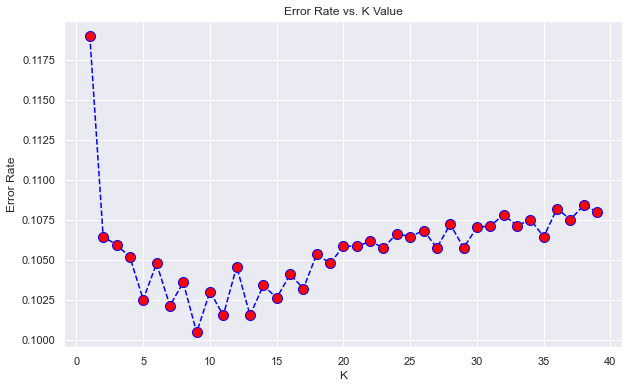

Minimum error:- 0.10047987464499064 at K = 9


In [58]:
# Plotting graph for 'Error Rate vs. K Value' to check most accurate K value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [59]:
# Using nearest value as 9 to predict the values again
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [60]:
# predicting the values after setting n_neighbors=9
y_pred = knn.predict(x_test)

In [61]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Accuracy improved from 89.74% to 89.95%

0.8995201253550094